In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SSLimPy.interface.sslimpy as sslimpy

import astropy.units as u

In [11]:
cosmodict={"h":0.67,"Omegam":0.32,"Omegab":0.04,"As":2.1e-9, "mnu":0.06}
settings = {"code":"class",
            "do_RSD" : True,
            "nonlinearRSD" : True,
            "FoG_damp" : "ISTF_like",
            "do_onehalo" : True,
            "halo_model_PS" : False,
            }
Asslimpy = sslimpy.sslimpy(settings_dict=settings,
                           cosmopars=cosmodict)

#--------------------------------------------------#

  SSSSS   SSSSS  L       i            PPPP   y    y 
 S     S S     S L            m   m   P    P y   y  
 S       S       L     iii   m m m m  P    P  y y   
  SSSSS   SSSSS  L       i   m  m  m  PPPP     y    
       S       S L       i   m     m  P        y    
 S     S S     S L       i   m     m  P       y     
  SSSSS   SSSSS  LLLLL iiiii m     m  P      y      

#--------------------------------------------------#


In [12]:
from SSLimPy.LIMsurvey import PowerSpectra
pobs = PowerSpectra.PowerSpectra(Asslimpy.fiducialcosmo,Asslimpy.fiducialastro)

requested Pk shape: (199, 126, 1)


In [4]:
min(pobs.Pk[-1,:,0])

<Quantity 0.43193535 Mpc3>

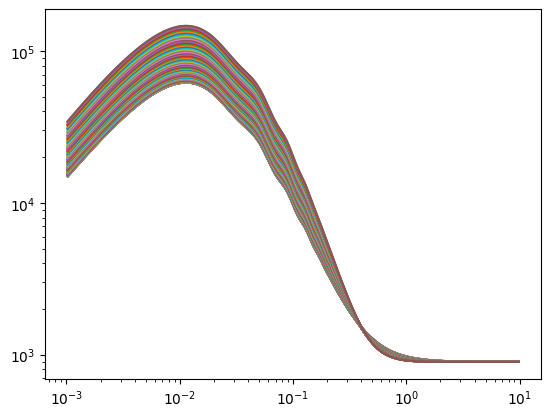

In [13]:
plt.loglog(pobs.k,np.squeeze(pobs.Pk_obs))

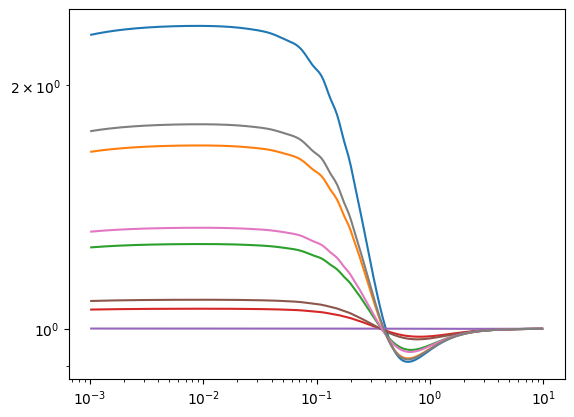

In [22]:
plt.loglog(pobs.k,np.squeeze(pobs.Pk_obs[:,::16,:])/np.squeeze(pobs.Pk_obs[:,62,:])[:,None])

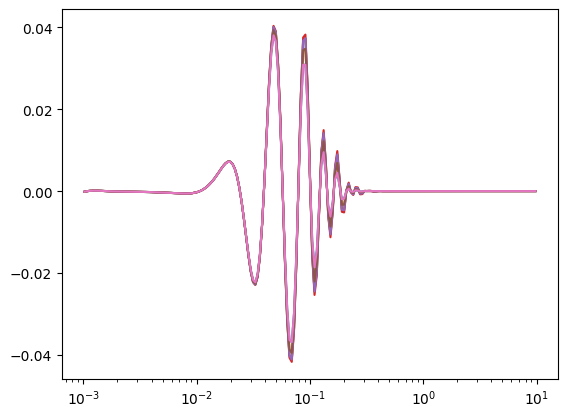

In [13]:
from scipy.interpolate import RectBivariateSpline
k = pobs.k
mu = np.linspace(-1,1,7)
Pk_dw_grid = pobs.dewiggled_pdd(pobs.k,mu,pobs.z)
Pk_nw_grid = Asslimpy.fiducialcosmo.nonwiggle_pow(pobs.k,pobs.z)[:,None]
test_1 = Pk_dw_grid/Pk_nw_grid-1
inter_over = RectBivariateSpline(np.log(k.value),mu,test_1)
plt.plot(k,inter_over(np.log(k.value),mu))
plt.xscale("log")

In [23]:
Asslimpy.fiducialastro.CLT(pobs.z)

<Quantity [0.00104043] Mpc3 uK / solLum>

In [24]:
print(Asslimpy.fiducialastro.Tmoments(pobs.z))
print(Asslimpy.fiducialastro.Tmoments(pobs.z,moment=2))

[1.49946184] uK
[895.78840942] Mpc3 uK2


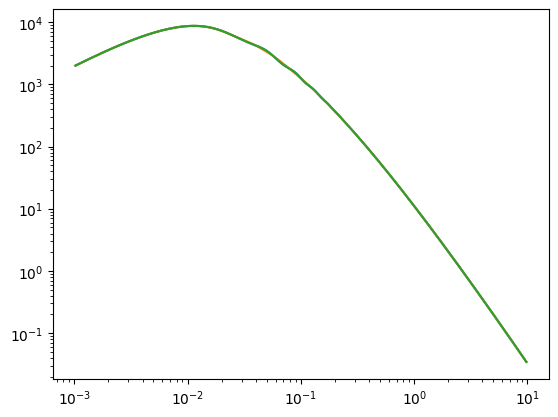

In [26]:
k = pobs.k
z = pobs.z
plt.loglog(k,Asslimpy.fiducialcosmo.matpow(k,z))
plt.loglog(k,Asslimpy.fiducialcosmo.nonwiggle_pow(k,z))
plt.loglog(k,pobs.dewiggled_pdd(k,1,z))

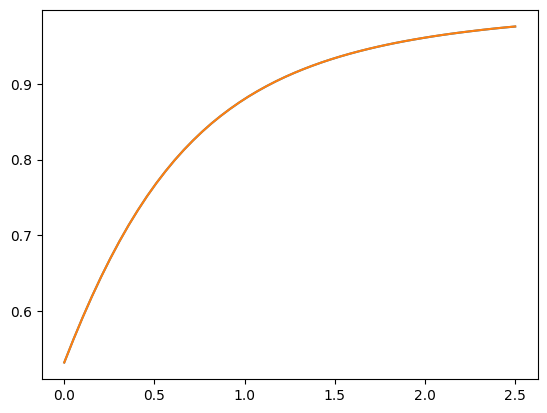

In [27]:
z = np.linspace(0,2.5)
plt.plot(z,Asslimpy.fiducialcosmo.growth_rate(1e-4/u.Mpc,z,tracer="matter"))
plt.plot(z,Asslimpy.fiducialcosmo.growth_rate(1e-4/u.Mpc,z,tracer="clustering"))

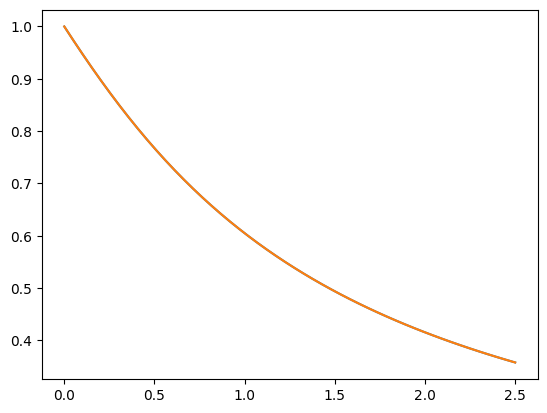

In [28]:
z = np.linspace(0,2.5)
plt.plot(z,Asslimpy.fiducialcosmo.growth_factor(1e-4/u.Mpc,z,tracer="matter"))
plt.plot(z,Asslimpy.fiducialcosmo.growth_factor(1e-4/u.Mpc,z,tracer="clustering"))

In [30]:
k = np.array(range(4))* 1e-3 / u.Mpc
Asslimpy.fiducialcosmo.growth_factor(k,z=np.array(range(4)))

/home/sefa/Schreibtisch/LIM-code/SSLimPy/SSLimPy/cosmology/cosmology.py:996: RuntimeWarning: divide by zero encountered in log
  logk = np.log(k.to(1/u.Mpc).value)


array([[1.        , 0.60485487, 0.4153741 , 0.31386046],
       [1.        , 0.60515074, 0.41580346, 0.31435095],
       [1.        , 0.60519359, 0.4158754 , 0.31444532],
       [1.        , 0.60522031, 0.41591649, 0.31449419]])

In [5]:
Asslimpy.fiducialcosmo.P_ThetaTheta_Moments(np.array(range(4)))

<Quantity [9.06127778, 5.48873691, 3.77446819, 2.85551479] Mpc>

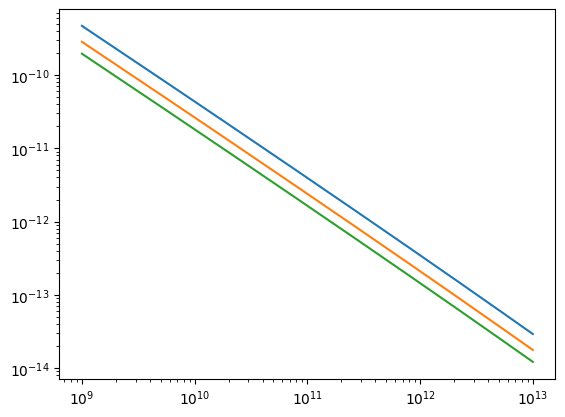

In [6]:
M = np.geomspace(1e9,1e13,200)*u.Msun
plt.loglog(M,-1*Asslimpy.fiducialastro.dsigmaM_dM(M,np.array(range(3))))

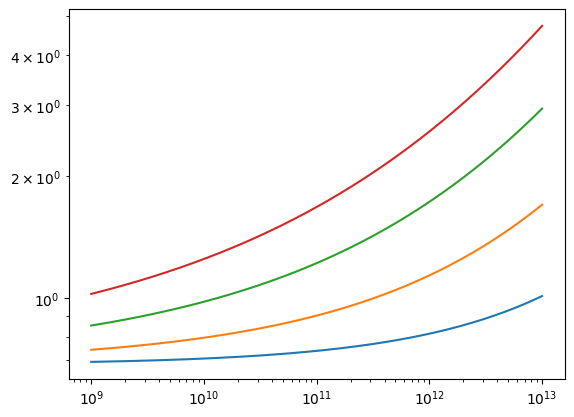

In [7]:
plt.loglog(M,Asslimpy.fiducialastro.halobias(M,np.array(range(4))))

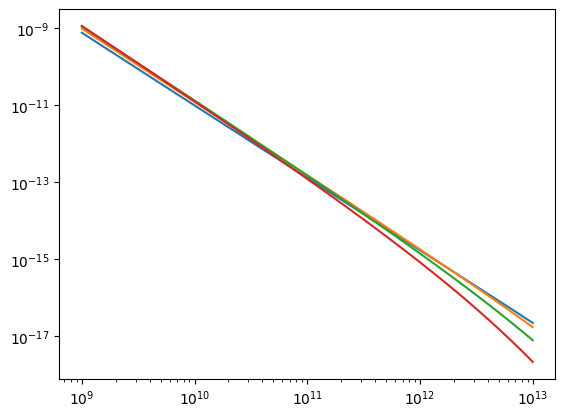

In [8]:
plt.loglog(M,Asslimpy.fiducialastro.halomassfunction(M,np.array(range(4))))

(0.01, 0.4)

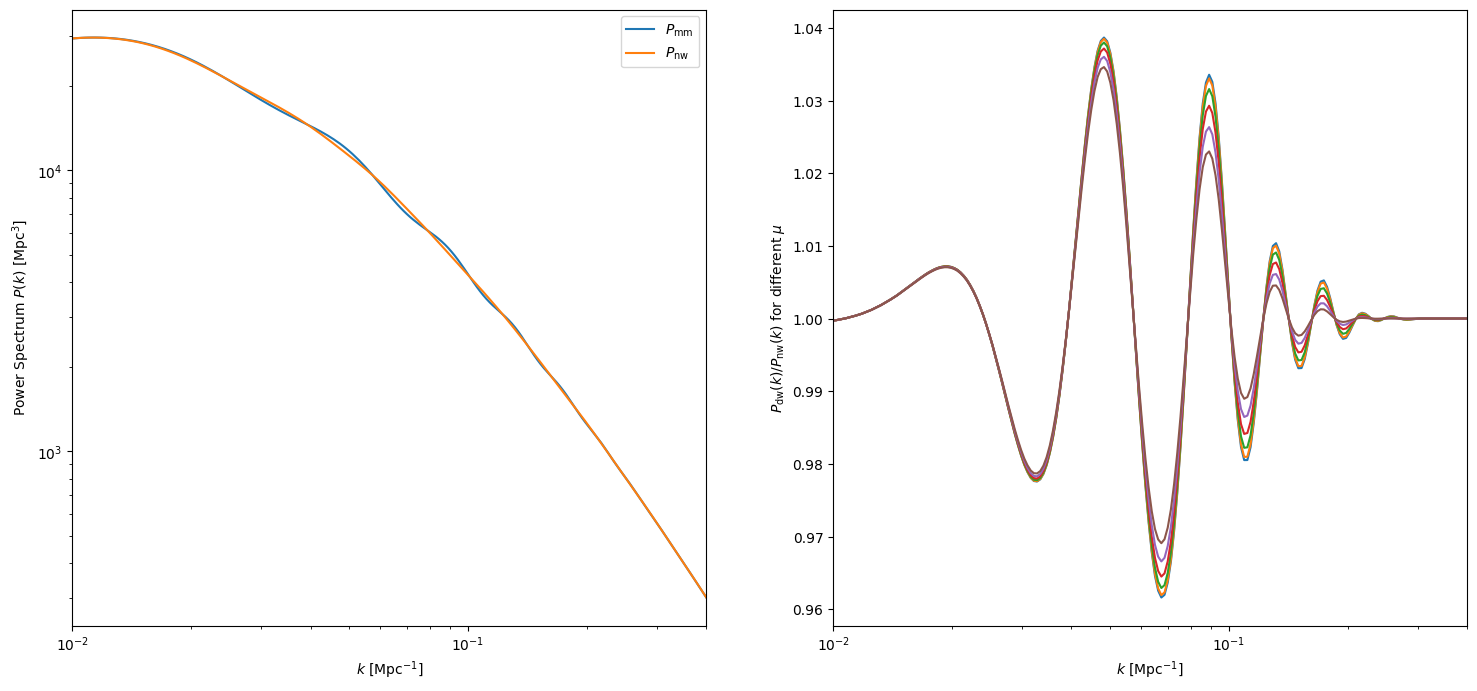

In [15]:
z=1
kk= np.logspace(-2,np.log10(0.4),200)/u.Mpc

fig, axs = plt.subplots(1,2,figsize=(18,8))

axs[0].loglog(kk,A.cosmology.matpow(kk,z),label='$P_\mathrm{mm}$')
axs[0].loglog(kk,A.cosmology.nonwiggle_pow(kk,z),label='$P_\mathrm{nw}$')
axs[0].set_xlabel('$k$ [$\mathrm{Mpc}^{-1}$]')
axs[0].set_ylabel('Power Spectrum $P(k)$ [$\mathrm{Mpc}^{3}$]')
axs[0].legend()
axs[0].set_xlim([1e-2,0.4])


mus = np.linspace(0,1,6)
for mu in mus:
    axs[1].plot(kk,A.dewiggled_pdd(kk,z,mu)/A.fiducialcosmo.nonwiggle_pow(kk,z))

axs[1].set_xscale('log')
axs[1].set_xlabel('$k$ [$\mathrm{Mpc}^{-1}$]')
axs[1].set_ylabel('$P_\mathrm{dw}(k)$/$P_\mathrm{nw}(k)$ for different $\mu$')
axs[1].set_xlim([1e-2,0.4])

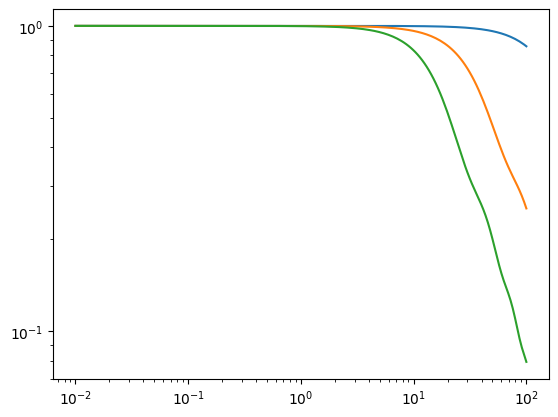

In [12]:
k = np.geomspace(1e-2,100,200) * 1/u.Mpc
plt.loglog(k,A.ft_NFW(k,np.array([1e9,1e11,1e12])*u.Msun,0))


In [11]:
A.ft_NFW(k,np.array([1e9,1e11,1e12])*u.Msun,0)

array([[0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.

In [4]:
Asslimpy.fiducialcosmo.sigma8_of_z(0)

<Quantity 0.85974762>

#--------------------------------------------------#

  SSSSS   SSSSS  L       i            PPPP   y    y 
 S     S S     S L            m   m   P    P y   y  
 S       S       L     iii   m m m m  P    P  y y   
  SSSSS   SSSSS  L       i   m  m  m  PPPP     y    
       S       S L       i   m     m  P        y    
 S     S S     S L       i   m     m  P       y     
  SSSSS   SSSSS  LLLLL iiiii m     m  P      y      

#--------------------------------------------------#
#--------------------------------------------------#

  SSSSS   SSSSS  L       i            PPPP   y    y 
 S     S S     S L            m   m   P    P y   y  
 S       S       L     iii   m m m m  P    P  y y   
  SSSSS   SSSSS  L       i   m  m  m  PPPP     y    
       S       S L       i   m     m  P        y    
 S     S S     S L       i   m     m  P       y     
  SSSSS   SSSSS  LLLLL iiiii m     m  P      y      

#--------------------------------------------------#
#-----------------------------------------

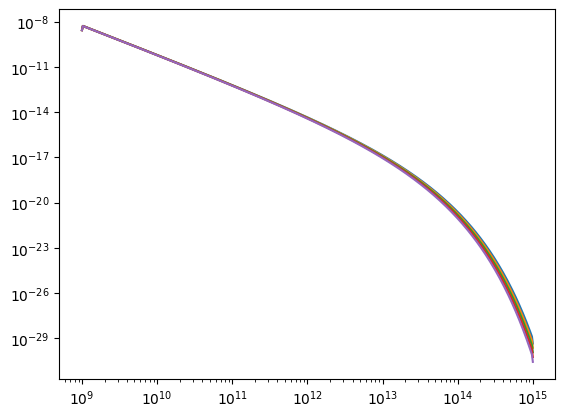

In [5]:
N =5
dn_dM = np.zeros((N,500))
mnu = (1+np.array(range(N)))*0.06

for im, mi in enumerate(mnu):
    cosmodict={"h":0.67,"Omegam":0.32,"Omegab":0.04,"As":2.1e-9, "mnu":mi}
    settings = {"code":"class"}

    Asslimpy = sslimpy.sslimpy(settings_dict=settings,
                            cosmopars=cosmodict)
    dn_dM[im,:] = Asslimpy.fiducialastro.results.dn_dM_of_M
plt.loglog(Asslimpy.fiducialastro.M,dn_dM.T)



/tmp/ipykernel_12371/438420510.py:1: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.
  plt.style.use("../plot-style.txt")


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (6).

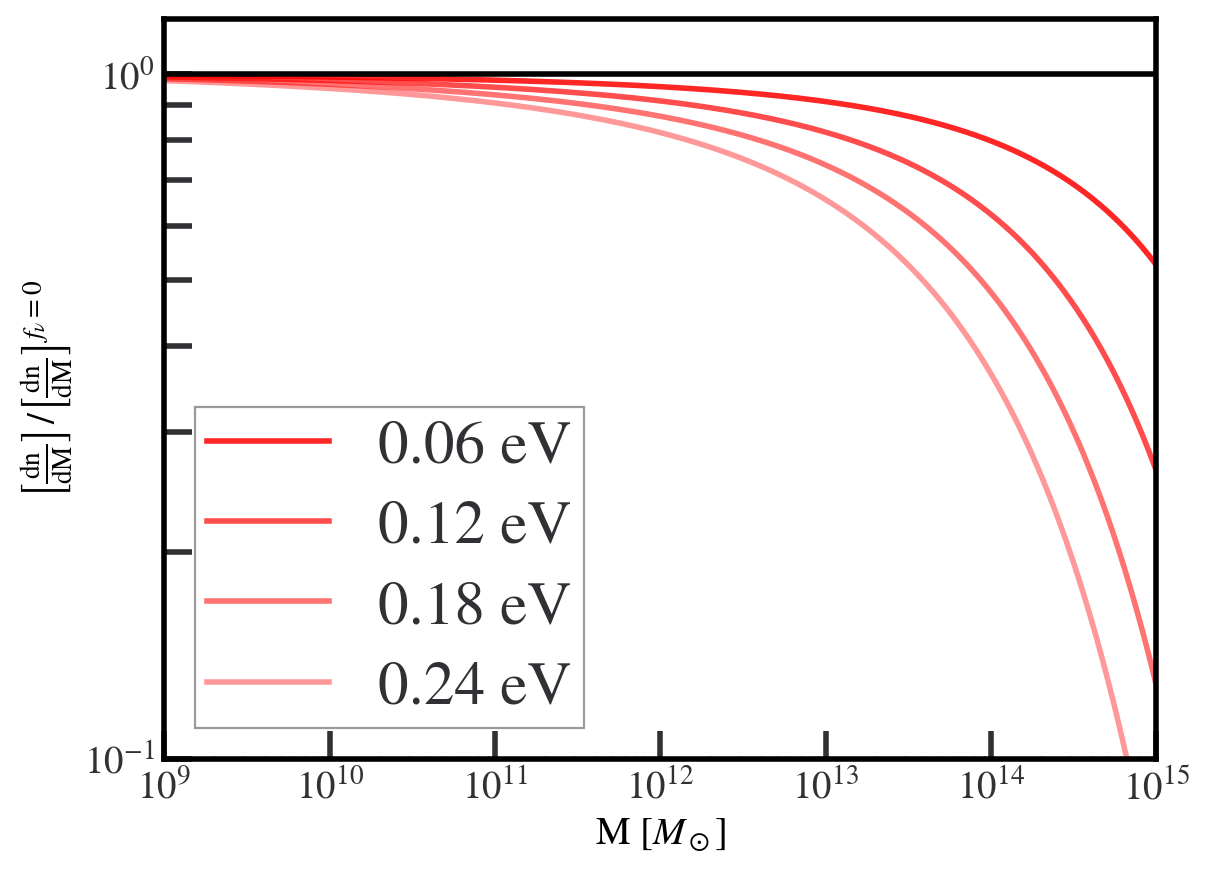

In [21]:
plt.style.use("../plot-style.txt")
M = Asslimpy.fiducialastro.M
for i in range(1,N):
    plt.loglog(M, dn_dM[i]/dn_dM[0],c="red",alpha=1-i*0.15,label="{} eV".format(i*0.06))
plt.plot(M,np.ones_like(M),c="black")
plt.xlabel("M [$M_\odot$]")
plt.legend(fontsize=22)
plt.ylabel(r"$\left[\frac{\mathrm{dn}}{\mathrm{dM}}\right]^{}/\left[\frac{\mathrm{dn}}{\mathrm{dM}}\right]^{f_\nu =0}$")
plt.ylim(1e-1,1.2)
plt.xlim(1e9,1e15)
a = np.linspace(0.1,1,10)
plt.minorticks_on()
plt.yticks(a,labels=["0.1","","","","","1"])
plt.yticks()
# plt.savefig("dn_dM_neutrinos.pdf")

In [3]:
plt.style.use("../plot-style.txt")


/tmp/ipykernel_107981/1563244562.py:1: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.
  plt.style.use("../plot-style.txt")


Text(0, 0.5, '$P_{mm}(k)[\\mathrm{Mpc}^{3}]$')

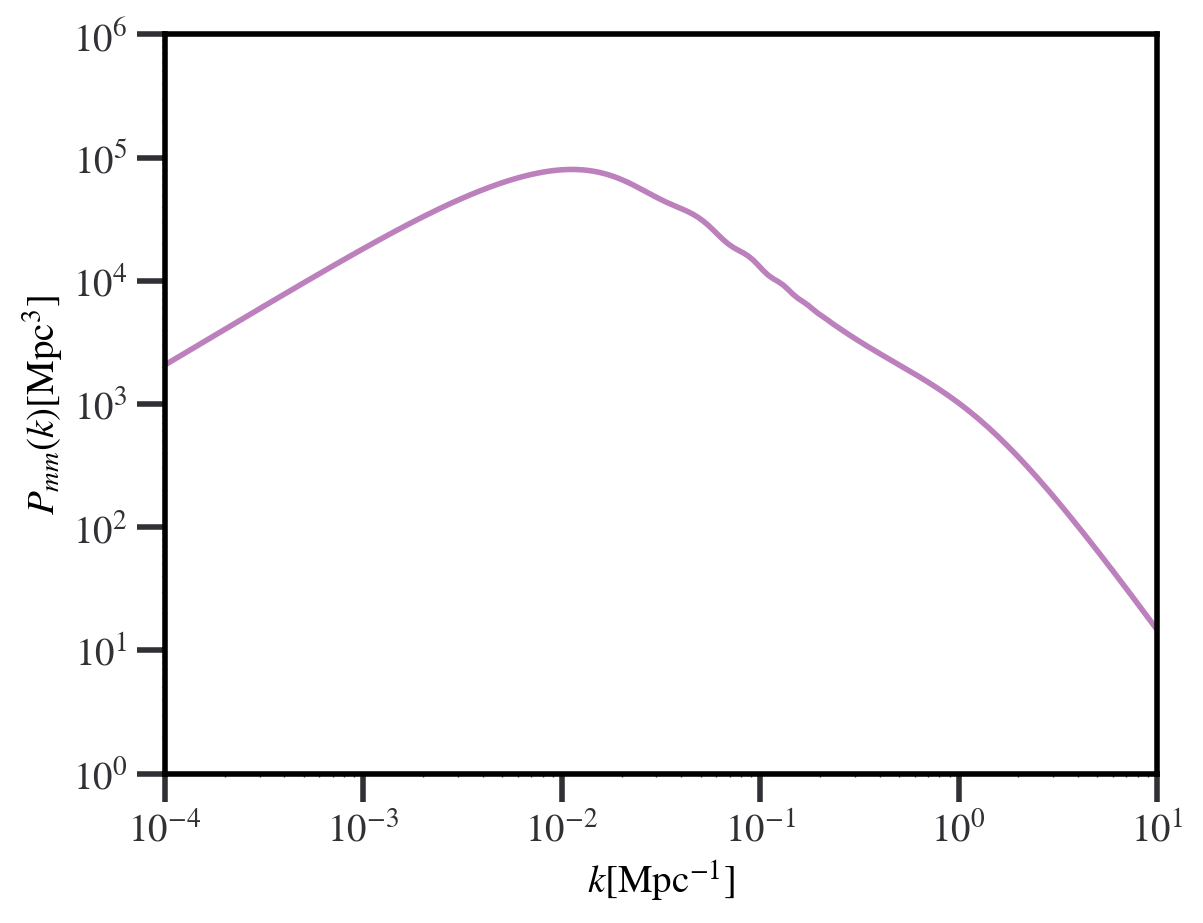

In [8]:
k = np.geomspace(1e-4,10,200)
plt.loglog(k,Asslimpy.fiducialcosmo.matpow(0,k,nonlinear=True))
plt.xlim(1e-4,10)
plt.xlabel(r"$k[\mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P_{mm}(k)[\mathrm{Mpc}^{3}]$")

In [20]:
Asslimpy.fiducialastro.M,Asslimpy.fiducialastro.results.dn_dM_of_M.shape

(<Quantity [1.00000000e+09, 1.02807322e+09, 1.05693455e+09, 1.08660611e+09,
            1.11711065e+09, 1.14847155e+09, 1.18071285e+09, 1.21385926e+09,
            1.24793621e+09, 1.28296980e+09, 1.31898690e+09, 1.35601511e+09,
            1.39408283e+09, 1.43321923e+09, 1.47345431e+09, 1.51481892e+09,
            1.55734477e+09, 1.60106446e+09, 1.64601150e+09, 1.69222035e+09,
            1.73972643e+09, 1.78856616e+09, 1.83877698e+09, 1.89039738e+09,
            1.94346693e+09, 1.99802631e+09, 2.05411735e+09, 2.11178304e+09,
            2.17106760e+09, 2.23201647e+09, 2.29467637e+09, 2.35909533e+09,
            2.42532274e+09, 2.49340937e+09, 2.56340741e+09, 2.63537052e+09,
            2.70935387e+09, 2.78541416e+09, 2.86360972e+09, 2.94400048e+09,
            3.02664806e+09, 3.11161583e+09, 3.19896892e+09, 3.28877429e+09,
            3.38110078e+09, 3.47601918e+09, 3.57360225e+09, 3.67392478e+09,
            3.77706369e+09, 3.88309805e+09, 3.99210913e+09, 4.10418050e+09,
            

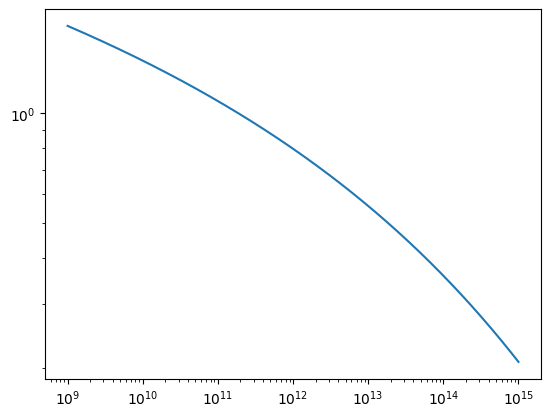

In [6]:
plt.loglog(Asslimpy.fiducialastro.M,Asslimpy.fiducialastro.results.sigmaM[:,0])


In [4]:
pobs.prepare_c_NFW()

UnitTypeError: Can only apply 'log10' function to dimensionless quantities

In [7]:
k= np.geomspace(1e-3,1,200)
z= np.array(range(4))
M = np.geomspace(1e7*u.Msun,1e11*u.Msun)
sigma_m_z = Asslimpy.fiducialastro.sigmaM_of_z(M,z)


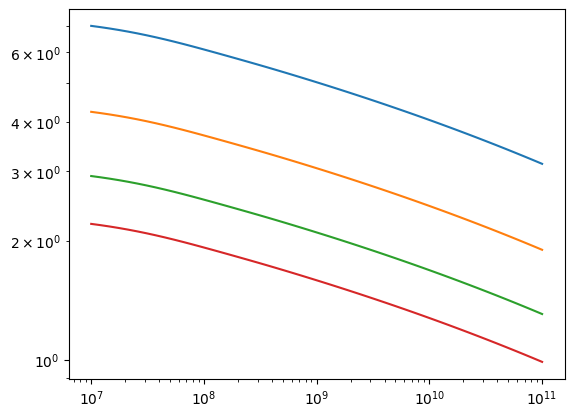

In [8]:
plt.loglog(M,sigma_m_z)

Text(0, 0.5, '$T_{cb}/T_{mm}$')

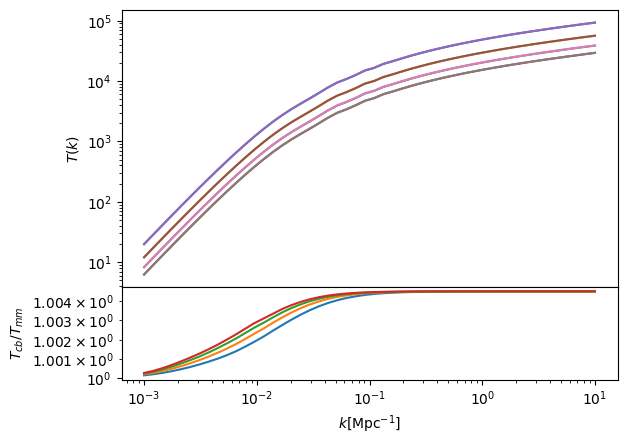

In [11]:
k= np.geomspace(1e-3,10)
fig, axs = plt.subplots(2,1,height_ratios=[3,1],sharex=True)
axs[0].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k).T)
axs[0].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k,tracer="clustering").T)
axs[1].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k,tracer="clustering").T/Asslimpy.fiducialcosmo.Transfer(z,k,tracer="matter").T)
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel("$k [\mathrm{Mpc}^{-1}]$")
axs[0].set_ylabel("$T(k)$")
axs[1].set_ylabel("$T_{cb}/T_{mm}$")

In [9]:
import numpy as np


def match_shapes(A, B):
    shape_A = list(A.shape)
    shape_B = list(B.shape)

    if len(shape_A) > len(shape_B):
        shape_A, shape_B = shape_B, shape_A
        A, B = B, A

    # Now, shape_A is guaranteed to be the smaller or equal one
    new_shape_A = []
    j = 0  # Index for shape_A

    for i in range(len(shape_B)):
        if j < len(shape_A) and shape_A[j] == shape_B[i]:
            new_shape_A.append(shape_A[j])
            j += 1
        else:
            new_shape_A.append(1)

    # Reshape A to the new shape
    A = A.reshape(new_shape_A)
    
    return A, B

# Example usage
A = np.ones((1,5,7))
B = np.ones((1,2,3,5,6,7))

A_matched, B_matched = match_shapes(A, B)
print("Shape of A before matching:", A.shape)
print("Shape of B before matching:", B.shape)
print("Shape of A after matching:", A_matched.shape)
print("Shape of B after matching:", B_matched.shape)


Shape of A before matching: (1, 5, 7)
Shape of B before matching: (1, 2, 3, 5, 6, 7)
Shape of A after matching: (1, 1, 1, 5, 1, 7)
Shape of B after matching: (1, 2, 3, 5, 6, 7)


In [12]:
A = np.ones((8,5,6,5,8))
B = np.ones((8,2,3,4,5,7,6,5,8))

A_matched, B_matched = match_shapes(A, B)
print("Shape of A before matching:", A.shape)
print("Shape of B before matching:", B.shape)
print("Shape of A after matching:", A_matched.shape)
print("Shape of B after matching:", B_matched.shape)

Shape of A before matching: (8, 5, 6, 5, 8)
Shape of B before matching: (8, 2, 3, 4, 5, 7, 6, 5, 8)
Shape of A after matching: (8, 1, 1, 1, 5, 1, 6, 5, 8)
Shape of B after matching: (8, 2, 3, 4, 5, 7, 6, 5, 8)
